size (184, 184)


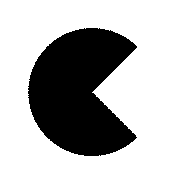

In [2]:
from PIL import Image, ImageChops
import numpy as np
pacman = Image.open('pacman.png')
print('size', pacman.size)
pacman = pacman.resize((184, 184), Image.ANTIALIAS)
pacman = pacman.convert('1')
pacman

In [3]:
pacman.histogram()[-1]

24207

In [4]:
pacman.histogram()[0]

9649

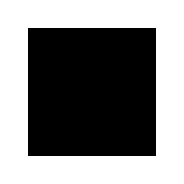

In [5]:
square = Image.open('square.png').resize((184, 184), Image.ANTIALIAS).convert('1')
square

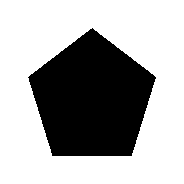

In [6]:
pentagon = Image.open('pentagon.png').resize((184, 184), Image.ANTIALIAS).convert('1')
pentagon

In [7]:
def darkPixelTotal(imgA):
    return imgA.histogram()[0]

def percentDiff(a, b):
    numerator = float(a.histogram()[0] - b.histogram()[0])
    denominator = float(a.histogram()[0] + b.histogram()[0])
    if denominator == 0:
        return 0
    else:
        return abs(numerator / denominator)

print('pacman, square', percentDiff(pacman, square))
print('pentagon, square', percentDiff(pacman, pentagon))

pacman, square 0.2587100987208543
pentagon, square 0.07920603110983873


In [8]:
print('total')
total = pacman.size[0] * pacman.size[1]
print(total)
print('pacman', sum(pacman.histogram()))
print('square', sum(square.histogram()))

total
33856
pacman 33856
square 33856


In [9]:
print('black')
print('pacman', pacman.histogram()[0])
print('square', square.histogram()[0])

black
pacman 9649
square 16384


In [10]:
print('white')
print('pacman', pacman.histogram()[-1])
print('square', square.histogram()[-1])

white
pacman 24207
square 17472


In [11]:
np.array(pacman)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [12]:
def similar_pixels(a, b):
    return (np.array(a) == np.array(b)).sum()

similar_pixels(pacman, square)

27121

In [13]:
def different_pixels(a, b):
    return (np.array(a) != np.array(b)).sum()

different_pixels(pacman, square)

6735

In [14]:
def percent_pixels_different(a, b):
    total = float(a.size[0] * a.size[1])
    return different_pixels(a, b) / total
    
print('pacman, square', percent_pixels_different(pacman, square))
print('pentagon, square', percent_pixels_different(pacman, pentagon))

pacman, square 0.19893076559546313
pentagon, square 0.1329749527410208


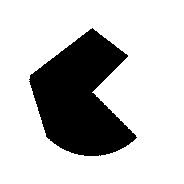

In [36]:
ImageChops.logical_or(pacman, pentagon)

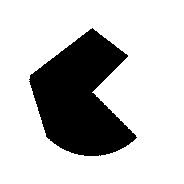

In [37]:
ImageChops.add_modulo(pacman, pentagon)

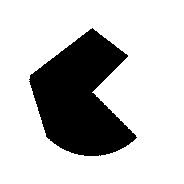

In [17]:
ImageChops.lighter(pacman, pentagon)

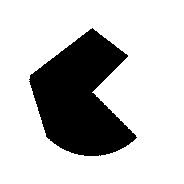

In [18]:
ImageChops.screen(pacman, pentagon)

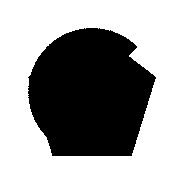

In [43]:
ImageChops.logical_and(pacman, pentagon)

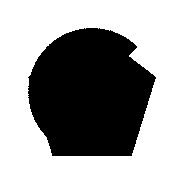

In [20]:
ImageChops.multiply(pacman, pentagon)

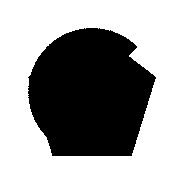

In [21]:
ImageChops.darker(pacman, pentagon)

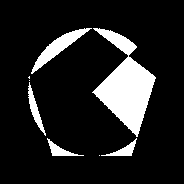

In [41]:
ImageChops.logical_xor(pacman, pentagon)

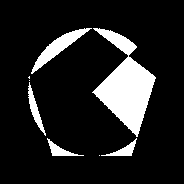

In [23]:
ImageChops.difference(pacman, pentagon)

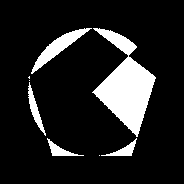

In [39]:
ImageChops.subtract_modulo(pacman, pentagon)

In [25]:
import random
random.randint(1, 6)

3

In [26]:
np.linspace(2,4,5).tolist()

[2.0, 2.5, 3.0, 3.5, 4.0]

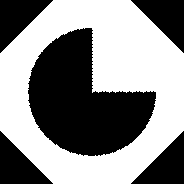

In [29]:
pacman.rotate(45)

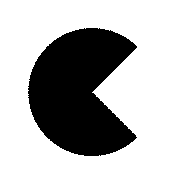

In [32]:
pacman

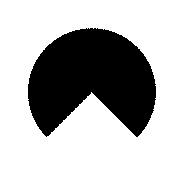

In [45]:
pacman.rotate(-90)

size (184, 184)


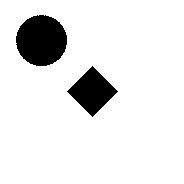

In [48]:
A = Image.open('A.png')
print('size', A.size)
A = A.resize((184, 184), Image.ANTIALIAS)
A = A.convert('1')
A

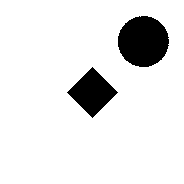

In [56]:
A.rotate(-90)

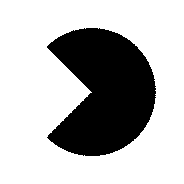

In [67]:
from PIL import ImageOps

ImageOps.flip(pacman)
ImageOps.mirror(pacman)

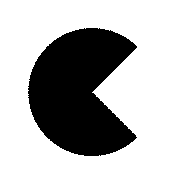

In [119]:
p_rot = pacman #.rotate(-90)
p_rot

In [120]:
arr = np.array(p_rot)
arr

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [106]:
def img_frombytes(data):
    size = data.shape[::-1]
    databytes = np.packbits(data, axis=1)
    return Image.frombytes(mode='1', size=size, data=databytes)

rows = arr.shape[0]
cols = arr.shape[1]

flip_symmetric_top = arr[:rows // 2]
flip_symmetric_bottom = arr[rows // 2:]
flip_symmetric_bottom_im = img_frombytes(flip_symmetric_bottom)
flip_symmetric_bottom_im_flipped = ImageOps.flip(flip_symmetric_bottom_im)
flip_symmetric_bottom_im_flipped_arr = np.array(flip_symmetric_bottom_im_flipped)

flip_symmetric_bottom.shape


16893

In [110]:
xor_flip = ImageChops.logical_xor(img_frombytes(flip_symmetric_top), img_frombytes(flip_symmetric_bottom_im_flipped_arr))

In [112]:
def num_white(a):
    return a.histogram()[-1]

num_white(xor_flip) / float(xor_flip.size[0] * xor_flip.size[1])

0.00206758034026465

In [125]:
def percent_similar_if_flipped(a):
    
    def img_frombytes(data):
        size = data.shape[::-1]
        databytes = np.packbits(data, axis=1)
        return Image.frombytes(mode='1', size=size, data=databytes)
    
    def num_white(a):
        return a.histogram()[-1]
    
    arr = np.array(a)
    rows = arr.shape[0]
    cols = arr.shape[1]

    flip_symmetric_top = arr[:rows // 2]
    flip_symmetric_bottom = arr[rows // 2:]
    flip_symmetric_bottom_im = img_frombytes(flip_symmetric_bottom)
    flip_symmetric_bottom_im_flipped = ImageOps.flip(flip_symmetric_bottom_im)
    flip_symmetric_bottom_im_flipped_arr = np.array(flip_symmetric_bottom_im_flipped)

    flip_symmetric_bottom.shape
    
    xor_flip = ImageChops.logical_xor(img_frombytes(flip_symmetric_top), img_frombytes(flip_symmetric_bottom_im_flipped_arr))
    
    return num_white(xor_flip) / float(xor_flip.size[0] * xor_flip.size[1])

percent_similar_if_flipped(p_rot)

0.00206758034026465

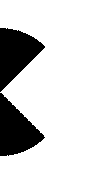

In [124]:
mirror_symmetric_left = arr[:, :cols // 2]
mirror_symmetric_right = arr[:, cols // 2:]
img_frombytes(mirror_symmetric_right)

In [128]:
def percent_similar_if_mirrored(a):
    
    def img_frombytes(data):
        size = data.shape[::-1]
        databytes = np.packbits(data, axis=1)
        return Image.frombytes(mode='1', size=size, data=databytes)
    
    def num_white(a):
        return a.histogram()[-1]
    
    arr = np.array(a)
    rows = arr.shape[0]
    cols = arr.shape[1]

    mirror_symmetric_left = arr[:, :cols // 2]
    mirror_symmetric_right = arr[:, cols // 2:]
    mirror_symmetric_right_im = img_frombytes(mirror_symmetric_right)
    mirror_symmetric_right_im_flipped = ImageOps.mirror(mirror_symmetric_right_im)
    mirror_symmetric_right_im_flipped_arr = np.array(mirror_symmetric_right_im_flipped)
    xor_flip = ImageChops.logical_xor(img_frombytes(mirror_symmetric_left), img_frombytes(mirror_symmetric_right_im_flipped_arr))
    return num_white(xor_flip) / float(xor_flip.size[0] * xor_flip.size[1])

percent_similar_if_flipped(p_rot.rotate(90))

0.00206758034026465

size (184, 184)


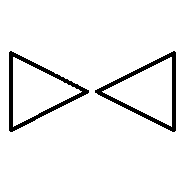

In [131]:
A = Image.open('A.png')
print('size', A.size)
A = A.resize((184, 184), Image.ANTIALIAS)
A = A.convert('1')
A

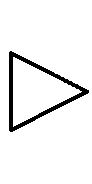

In [182]:
def img_frombytes(data):
        size = data.shape[::-1]
        databytes = np.packbits(data, axis=1)
#         databytes = np.ascontiguousarray(mirror_symmetric_left, dtype=np.bool)
        return Image.frombytes(mode='1', size=size, data=databytes)
    
arr_1 = np.array(A)
mirror_symmetric_left = arr_1[:, :cols // 2]
img_frombytes(mirror_symmetric_left)

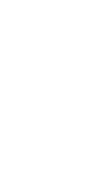

In [162]:

ones_zeroes = mirror_symmetric_left[:]

Image.fromarray(mirror_symmetric_left, mode="1")

In [178]:
con = np.ascontiguousarray(mirror_symmetric_left, dtype=np.int)
con

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

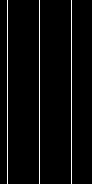

In [179]:
Image.frombytes(mode='1', size=con.shape[::-1], data=con)

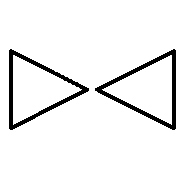

In [195]:
from PIL import ImageOps

# border = (0, 0, A.size[0] //2, A.size[1] - 1) # left, up, right, bottom
border = (0, 2, 0, 2) # left, up, right, bottom
ImageOps.crop(A, border)

In [196]:
A.size[1] //2

92

In [198]:
from itertools import permutations
[''.join(p) for p in permutations('124')]

['124', '142', '214', '241', '412', '421']